
# 理论知识回顾
## 一 分类问题概述
&emsp; <font color=green size=4>1.1 概念及其场景介绍</font>  
&emsp; <font color=green size=4>1.2 构建流程</font>  
&emsp; <font color=green size=4>1.3 评价方式</font>  
&emsp; <font color=green size=4>1.4 类别不平衡问题</font>  


# 二 相关算法概述
&emsp; <font color=green size=4>2.1 逻辑回归</font>  
&emsp; <font color=green size=4>3.2 决策树</font>  
&emsp; <font color=green size=4>3.3 其他算法</font>  
&emsp;&emsp;&emsp;   <font color=green size=3> K近邻、支持向量机、朴素贝叶斯</font>  



# 案例实战-学生成绩等级预测
## 一 背景介绍
## 二 探索性数据分析
## 三 构建baseline模型
&emsp; <font color=green size=4>3.1 one-hot介绍</font>  
&emsp; <font color=green size=4>3.2 特征工程</font>  
&emsp; <font color=green size=4>3.3 拆分数据集</font>  
&emsp; <font color=green size=4>3.4 构建逻辑回归模型</font>  
&emsp; <font color=green size=4>3.5 基于特征筛选构建逻辑回归模型</font>  
&emsp; <font color=green size=4>3.6 参数调优</font>  
## 四 决策树模型
&emsp; <font color=green size=4>4.1 特征工程</font>  
&emsp; <font color=green size=4>4.2 拆分数据集</font>  
&emsp; <font color=green size=4>4.3 构建逻辑回归模型</font>  
&emsp; <font color=green size=4>4.4 参数调优</font>  
&emsp; <font color=green size=4>4.5 特征重要性排序</font> 

# 一 分类问题概述
## 1.1 概念及其场景介绍
分类是一种典型的有监督学习问题，其应用场景如：信用风险评估、医学诊断和电子邮件分类等。  
信用风险评估：根据用户历史还款信息预测其未来是否会违约（涉及到一个经典问题：类别不平衡现象）;  
医学诊断：根据肿瘤细胞的特征进行良性和恶性的分类;  
电子邮件：根据邮件内容将邮件归类（正常邮件/垃圾邮件）  

## 1.2 构建流程
数据集拆分：将原始标注数据拆分为训练集与测试集，其中测试集用来评测模型的具体性能；  
分类器训练：即通过训练样本的特征和标签来建立分类模型；  
预测：利用分类模型对没有分类标签的数据进行预测分类。

<img src="./img/分类问题构建流程.png" width = "600" height = "400" alt="图片名称" align=left />

## 1.3 评价方式
如果是多分类问题，则负例是除自身的其他多个类别。下面是二分类的具体评测指标。  
<img src="./img/二分类问题评价指标.png" width = "500" height = "320" alt="图片名称" align=mid />  

## 1.4 类别不平衡问题

在分类问题中，不同的分类错误会导致不同的代价，如：病人误诊。  

### 解决方案  
&emsp;在类别不平衡时可以为不同类别的样本设置不同的权重（代价），该方法为<font color=blue size=2.5>代价敏感学习</font>的基础。  
&emsp;设置每个类别的权重与该分类在样本中出现的频率成反比。

### 案例介绍
&emsp;在医疗中，“将病人误诊为健康人的代价”与“将健康人误诊为病人的代价”不同；  
&emsp;在金融信用卡盗用检测中，“将盗用误认为正常使用的代价”与将“正常使用误认为盗用的代价”不同。    
&emsp;风控或者入侵检测，这两类任务都具有严重的数据不平衡问题，例如风控模型，将一个坏用户分类为好用户所造成的损失远远大于将一个好用户分成坏用户的损失，因此在这种情况下要尽量避免将坏用户分类为好用户，可以在算法学习的时候，为坏用户样本设置更高的学习权重，从而让算法更加专注于坏用户的分类情况【但是也会将很多好用户分类为坏用户，降低坏用户分类的精度】。


# 二 相关算法概述

## 2.1 逻辑回归
<img src="./img/逻辑回归.png" width = "500" height = "350" alt="图片名称" align=left />  

###  解决多分类方式

为了解决多分类问题，可以使用OVR和OVO方法。  

OVR(One Vs Rest)：某个分类问题有N类，将某一类和剩余的类比较作为二分类问题，N个类别进行N次分类，得到N个二分类模型，给定一个新的样本点，求出每种二分类对应的概率，概率最高的一类作为新样本的预测结果。  
OVO(One Vs One)：某个分类问题有N类，将某一类和另一类比较作为二分类问题，总共可分为$C_{n}^2$种不同的二分类模型，给定一个新的样本点，会得到$C_{n}^2$个预测结果，通过多数投票的方式来确定新样本的预测结果。

MVM(Many Vs Many):将数据集中的若干个类作为正类，若干个其他类作为反类。MVM的正、反类构造必须有特殊的设计，而不是随意选取，通常采用“纠错输出码（ECOC）”，产生编码矩阵后划分类别。

### 缓解模型过拟合问题
通常在损失函数上添加惩罚项L1范数或添加L2范数，模型正则化。 

### 常用优化方法
随机平均梯度下降法、坐标轴下降法、牛顿法和拟牛顿法等。

## 2.2 决策树
决策树两个阶段：构造树和剪枝。  
<img src="./img/决策树模型概述.png" width = "500" height = "320" alt="图片名称" align=left />  

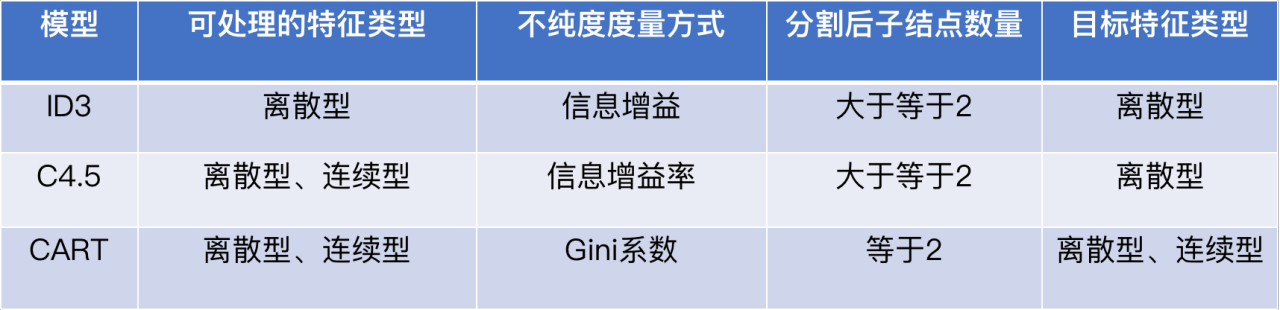

### 决策树剪枝

训练过程中，决策树完全生长，很容易造成过拟合，需要进行剪枝提高泛化能力。

剪枝分为预剪枝和后剪枝。  
预剪枝：在决策树生成过程中，每个结点在划分前先进行评价，若当前结点划分不能带来泛化能力的提升，则停止划分并将当前结点记为叶结点。  
后剪枝：在决策树生成后，自底向上对叶结点进行考察，若该结点对应的子树替换为叶结点可以提高决策树的泛化能力，则将该子树替换为叶结点。


## 2.3 其他算法

### K近邻  
    a. 确定K的大小和计算相似度（距离）的方法  
    b. 从训练样本中找到K个与测试样本“最近” 的样本  
    c. 根据这K个训练样本的类别，通过多数投票的方式来确定测试样本的类别  
### 支持向量机
    硬间隔SVM：训练集线性可分，通过最大化分类间隔得到分离超平面
    软间隔SVM：数据线性不可分，增加松弛变量(Slack Variables)
### 朴素贝叶斯
    基于贝叶斯定理和特征条件独立性假设的分类方法。

# 实战【学生成绩等级预测】
    案例非常典型。通过案例，我们可以熟悉分类问题解决路径。
    探索性数据分析 > 特征工程 > 构建baseline模型 > 进一步特征工程 > 模型调参 > 选择其他模型 > 模型调参

## 一、 背景介绍
数据集由480个学生记录和16个特征组成。这些特征分为三大类：

（1）性别和国籍等人口统计特征。  
（2）学历背景特征，如教育阶段，年级和隶属教室。  
（3）行为特征，如上课举手，访问资源，家长回答问卷调查，学校满意度等。

数据集收集来自两个学期：第一学期收集了245个学生记录，第二学期收集了235个学生记录。最后学生依据其总成绩被分为三类： 低：0-69、中：70-89、高：90-100。我们的任务是根据收集的数据预测学生的成绩等级。

### 字段说明
<img src="./img/分类字段说明.png" width = "700" height = "500" alt="图片名称" align=left />  

## 二、 探索性数据分析
    主要包括三小块：读取数据；目标变量可视化【分析是否存在严重类别不平衡问题】；分析变量与目标变量之间的关系，为构建模型做铺垫。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/StudentPerformance.csv') # 读取 csv 数据
df.head(10) # 查看前十行数据

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


In [6]:
df.isnull().sum() # 查看数据是否缺失

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [4]:
df.dtypes # 检查数据类型[有些数据是离散数值型的，需要和字符型字段区分开]。

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

In [5]:
# 查看数据详细信息
df.describe(include='all')

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480.000000,480.000000,480.000000,480.000000,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,NaN,NaN,NaN,NaN,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,NaN,NaN,NaN,NaN,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,NaN,NaN,NaN,NaN,270,292,289,211
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.775000,54.797917,37.918750,43.283333,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.779223,33.080007,26.611244,27.637735,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.750000,20.000000,14.000000,20.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,65.000000,33.000000,39.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.000000,84.000000,58.000000,70.000000,NaN,NaN,NaN,NaN


### 2.1 列名命名方式统一

为方便我们统一，采用“大驼峰命名法”，改为首字母大写，其余小写。 

In [9]:
# 修改列名
df.rename(index=str, columns={'gender':'Gender',
                              'NationalITy':'Nationality',
                              'raisedhands':'RaisedHands', 
                              'VisITedResources':'VisitedResources'}, inplace=True)

In [7]:
df.rename(columns={'gender':'Gender',
                              'NationalITy':'Nationality',
                              'raisedhands':'RaisedHands', 
                              'VisITedResources':'VisitedResources'}, inplace=True)

In [10]:
df.head()

,Gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


### 2.2 可视化目标变量
成绩等级的数量分布条形图

In [11]:
## 绘制条形图
import seaborn as sns

<AxesSubplot:xlabel='Class', ylabel='count'>

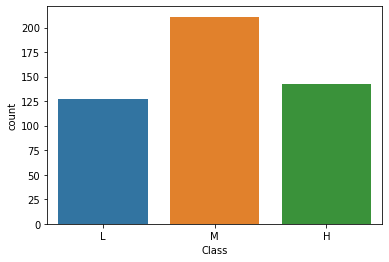

In [14]:
sns.countplot(x='Class', order=['L','M','H'], data=df) # 检查数据集是否平衡

<AxesSubplot:xlabel='Nationality', ylabel='count'>

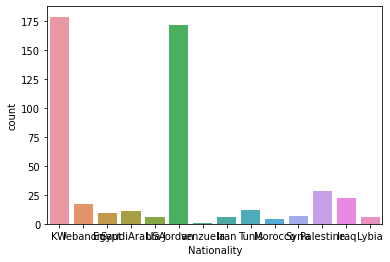

In [15]:
sns.countplot(x='Nationality', data=df) # 检查数据集是否平衡

<AxesSubplot:xlabel='Class'>

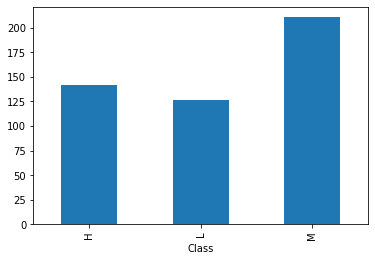

In [18]:
df.groupby(['Class'])['Class'].count().plot(kind='bar')

Text(0, 0.5, 'volumn')

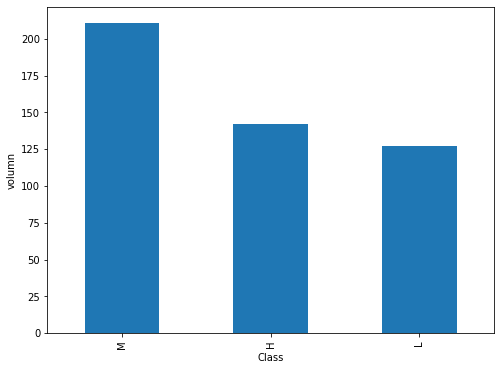

In [25]:
fig=plt.figure(figsize=(8,6))
df['Class'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('volumn')

结论：虽然成绩中等的学生要比其余两个成绩等级的学生多一些，但数据集不存在明显的类别分布极端不平衡情况。

### 2.3 不同学期，学生成绩等级的数量分布差异分析

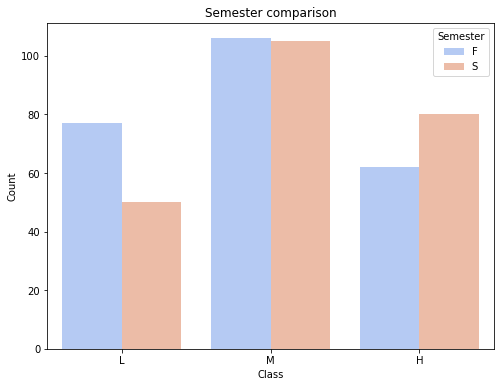

In [18]:
## 绘制条形图
plt.figure(figsize=(8, 6))
sem = sns.countplot(x='Class', hue='Semester', order=['L', 'M', 'H'], data=df, palette='coolwarm')
sem.set(xlabel='Class', ylabel='Count', title='Semester comparison')
plt.show()

[Text(0.5, 0, 'Class'), Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Semester')]

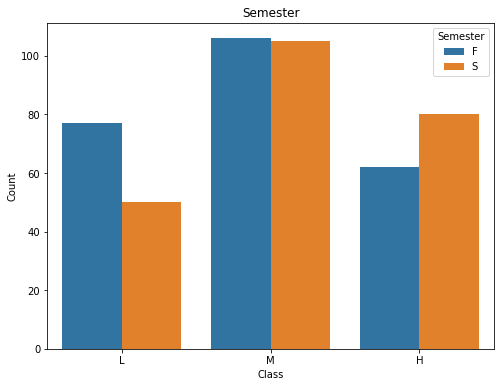

In [31]:
plt.figure(figsize=(8, 6))
sem=sns.countplot(x='Class',hue='Semester',order=['L', 'M', 'H'],data=df)
sem.set(xlabel='Class',ylabel='Count',title='Semester')

### 结论  
    学生在第一学期（F）的表现比第二学期（S）差一些【在第二学期，成绩中等的学生人数保持不变，但是成绩差的学生人数较少，而成绩好的学生人数较多】。

### 2.4 性别对学生成绩的影响

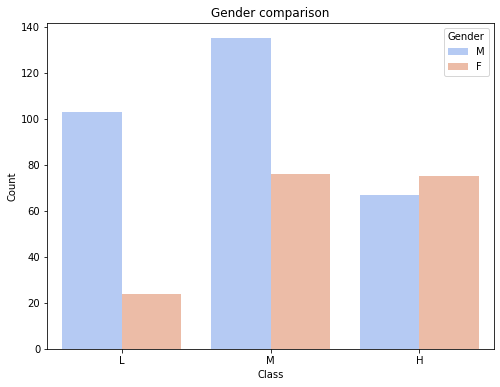

In [19]:
## 绘制条形图
plt.figure(figsize=(8, 6))
plot = sns.countplot(x='Class', hue='Gender', data=df, order=['L', 'M', 'H'], palette='coolwarm')
plot.set(xlabel='Class', ylabel='Count', title='Gender comparison')
plt.show()

学生中男生较多，并且与女生对比而言，男生低分成绩的人较多，高分成绩的人较少。

### 2.5 不同性别下, 访问在线资源和成绩的相关性

<AxesSubplot:xlabel='Class', ylabel='VisitedResources'>

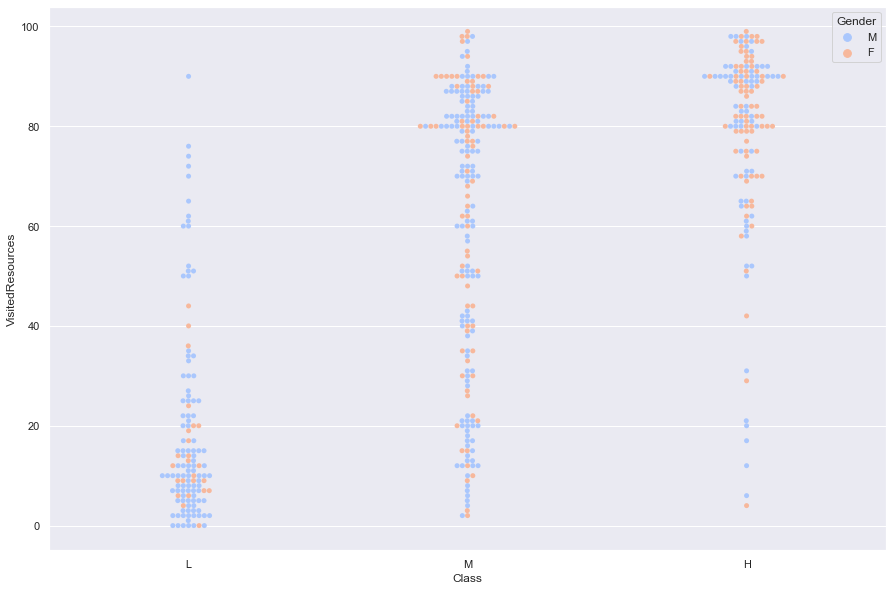

In [20]:
sns.set(rc={'figure.figsize': (15,10)})
sns.swarmplot(x='Class', y='VisitedResources', hue='Gender', palette='coolwarm', data=df, order=['L','M','H'])

<AxesSubplot:xlabel='Class', ylabel='VisitedResources'>

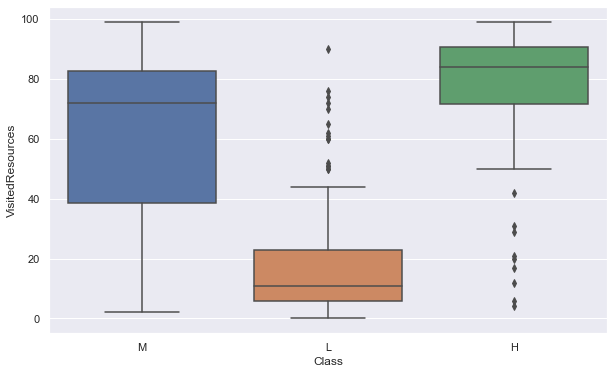

In [41]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Class", y="VisitedResources",data=df)

1. 获得低分（L）的学生比获得中等分数（M）或高分（H）的学生访问的资源少的多。  
2. 获得高分（H）的女性几乎都访问了很多在线资源。

### 2.6 上课讨论积极程度和成绩的关系

<AxesSubplot:xlabel='Class', ylabel='Discussion'>

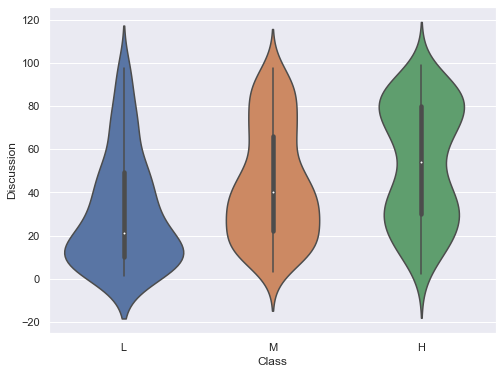

In [39]:
sns.set(rc={'figure.figsize': (8,6)})
sns.violinplot(x='Class', y='Discussion', data=df, order=['L','M','H'])

### 2.7 相关性矩阵

In [43]:
df_corr=df[['RaisedHands','VisitedResources','AnnouncementsView','Discussion']].corr()

<AxesSubplot:>

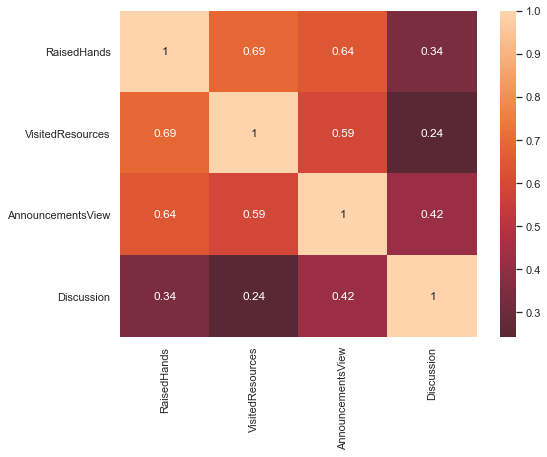

In [48]:
sns.heatmap(df_corr,vmax=1,center=0,annot=True)

## 三、baseline模型

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [24]:
df = pd.read_csv('data/StudentPerformance.csv') # 读取 csv 数据

# 修改列名
df.rename(index=str, columns={'gender':'Gender',
                              'NationalITy':'Nationality',
                              'raisedhands':'RaisedHands', 
                              'VisITedResources':'VisitedResources'}, inplace=True)

df.head(10) # 查看前十行数据

,Gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


In [25]:
df.shape

(480, 17)

### 3.1 one-hot介绍

In [26]:
df['Gender'].value_counts()

M    305
F    175
Name: Gender, dtype: int64

In [27]:
pd.get_dummies(df['Gender'])

,F,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
475,1,0
476,1,0
477,1,0
478,1,0


### 3.2 特征工程

In [28]:
X = df.drop('Class', axis=1)
Y = df['Class']
X = pd.get_dummies(X) # 将所有的分类型特征转换为数字, 虚拟变量: dummy variables
X.head(5)

,RaisedHands,VisitedResources,AnnouncementsView,Discussion,Gender_F,Gender_M,Nationality_Egypt,Nationality_Iran,Nationality_Iraq,Nationality_Jordan,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,15,16,2,20,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
1,20,20,3,25,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
2,10,7,0,30,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,30,25,5,35,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,40,50,12,50,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


### 3.3 拆分数据集
    讲数据集拆分为训练集与测试集，其中测试集用于评测模型的优劣。

In [1]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10,stratify=Y)
y_test.head(5)

NameError: name 'train_test_split' is not defined

### 3.4 构建逻辑回归模型

In [30]:
# 训练并且测试模型
Logit = LogisticRegression()
Logit.fit(X_train, y_train)

Predict = Logit.predict(X_test)
print('Predict', Predict)

Score = accuracy_score(y_test, Predict)
print('accuracy: ', Score)

Predict ['H' 'M' 'M' 'L' 'H' 'H' 'H' 'H' 'M' 'L' 'M' 'L' 'H' 'M' 'M' 'M' 'L' 'H'
 'M' 'H' 'L' 'M' 'M' 'H' 'M' 'L' 'H' 'H' 'M' 'H' 'H' 'H' 'L' 'M' 'H' 'L'
 'M' 'M' 'L' 'H' 'M' 'L' 'H' 'L' 'M' 'M' 'H' 'M' 'M' 'H' 'M' 'L' 'M' 'M'
 'M' 'H' 'H' 'L' 'M' 'H' 'H' 'L' 'H' 'M' 'M' 'M' 'M' 'H' 'L' 'H' 'M' 'L'
 'M' 'M' 'M' 'H' 'M' 'L' 'H' 'H' 'L' 'H' 'L' 'L' 'M' 'H' 'L' 'H' 'H' 'M'
 'M' 'L' 'M' 'M' 'H' 'M']
accuracy:  0.7708333333333334


### 3.5 基于特征筛选构建逻辑回归模型

特征打分：ANOVA方法、基于互信息、卡方检验等方法给特征打分后进行特征选择

In [31]:
X.corr().head()

,RaisedHands,VisitedResources,AnnouncementsView,Discussion,Gender_F,Gender_M,Nationality_Egypt,Nationality_Iran,Nationality_Iraq,Nationality_Jordan,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
RaisedHands,1.000000,0.691572,0.643918,0.339386,0.149978,-0.149978,-0.024964,-0.094925,0.192443,0.050686,...,-0.178358,0.178358,-0.364237,0.364237,-0.316570,0.316570,-0.297015,0.297015,-0.463882,0.463882
VisitedResources,0.691572,1.000000,0.594500,0.243292,0.210932,-0.210932,0.005028,-0.081024,0.192773,0.191266,...,-0.173219,0.173219,-0.360240,0.360240,-0.382472,0.382472,-0.363835,0.363835,-0.499030,0.499030
AnnouncementsView,0.643918,0.594500,1.000000,0.417290,0.052139,-0.052139,0.031622,-0.051854,0.154318,0.126169,...,-0.287066,0.287066,-0.339505,0.339505,-0.396357,0.396357,-0.298744,0.298744,-0.312134,0.312134
Discussion,0.339386,0.243292,0.417290,1.000000,0.124703,-0.124703,0.010264,-0.003192,0.055484,-0.006725,...,-0.019083,0.019083,-0.026720,0.026720,-0.232197,0.232197,-0.061104,0.061104,-0.218778,0.218778
Gender_F,0.149978,0.210932,0.052139,0.124703,1.000000,-1.000000,-0.040886,-0.046264,-0.041827,0.147061,...,0.049156,-0.049156,-0.195142,0.195142,-0.022359,0.022359,-0.093478,0.093478,-0.209011,0.209011


In [32]:
from sklearn.feature_selection import chi2, SelectKBest

# 特征工程
X = df.drop('Class', axis=1)
y = df['Class']
X = pd.get_dummies(X) # 将所有的分类型特征转换为数字, 虚拟变量: dummy variables

# 特征选择
sel = SelectKBest(chi2,k=40)
X = sel.fit_transform(X, y)

In [33]:
X.shape

(480, 40)

In [34]:
# 生成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [35]:
model = LogisticRegression()
model.fit(X_train, y_train)

pre = model.predict(X_test)

metrics = accuracy_score(y_test, pre)
print('metrics: ', metrics)

metrics:  0.78125


### 3.6 参数优化
对LogisticRegression类中的参数C、penalty和class_weight进行调整：

#### 3.6.1 class_weight
用于设置分类模型中各种类型的权重，默认为不输入，也就是不考虑权重，即为None，也可以是一个字典或者’balanced’字符串。  
balanced：让类库自己计算类型权重；传入字典：自己输入各个类型的权重。
    
#### 3.6.2 案例
比如对于0,1的二元模型，我们可以定义class_weight={0:0.9,1:0.1}，这样类型0的权重为90%，而类型1的权重为10%。如果class_weight选择balanced，那么类库会根据训练样本量来计算权重。某种类型样本量越多，则权重越低，样本量越少，则权重越高。

#### 3.6.3 class_weight作用 【在分类模型中，我们经常会遇到两类问题】

    1. 误分类的代价很高。比如对合法用户和非法用户进行分类，将非法用户分类为合法用户的代价很高，我们宁愿将合法用户分类为非法用户，这时可以人工再甄别，但是却不愿将非法用户分类为合法用户。这时，我们可以适当提高非法用户的权重。  
    2. 样本是高度失衡的，比如我们有合法用户和非法用户的二元样本数据10000条，里面合法用户有9995条，非法用户只有5条，如果我们不考虑权重，则我们可以将所有的测试集都预测为合法用户，这样预测准确率理论上有99.95%，但是却没有任何意义。这时，我们可以选择balanced，让类库自动提高非法用户样本的权重。提高了某种分类的权重，相比不考虑权重，会有更多的样本分类划分到高权重的类别，从而可以解决上面两类问题。

#### 其他参数
    fit_intercept：是否存在截距或偏差，bool类型，默认为True。
    
    max_iter：算法收敛最大迭代次数，int类型，默认为10。
        仅在正则化优化算法为newton-cg, sag和lbfgs才有用，算法收敛的最大迭代次数。
        
    solver：优化算法选择参数，有五个可选参数，即newton-cg,lbfgs,liblinear,sag,saga。默认为liblinear。solver参数决定了我们对逻辑回归损失函数的优化方法，有四种算法可以选择，分别是： 
        liblinear：使用了开源的liblinear库实现，内部使用了坐标轴下降法来迭代优化损失函数。
        lbfgs：拟牛顿法的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
        newton-cg：也是牛顿法家族的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
        sag：即随机平均梯度下降，是梯度下降法的变种，和普通梯度下降法的区别是每次迭代仅仅用一部分的样本来计算梯度，适合于样本数据多的时候。
        saga：线性收敛的随机优化算法的的变种。
        
    multi_class：分类方式选择参数，str类型，可选参数为ovr和multinomial，默认为ovr。
        ovr即前面提到的one-vs-rest(OvR)，而multinomial即前面提到的many-vs-many(MvM)。如果是二元逻辑回归，ovr和multinomial并没有任何区别，区别主要在多元逻辑回归上。 
        OvR和MvM区别：OvR的思想更简单，多元逻辑回归可以看做二元逻辑回归。具体做法是，对于第K类的分类决策，我们把所有第K类的样本作为正例，除了第K类样本以外的所有样本都作为负例，然后在上面做二元逻辑回归，得到第K类的分类模型。其他类的分类模型获得以此类推。而MvM则相对复杂，比如，MvM的特例one-vs-one(OvO)：如果模型有T类，每次在所有的T类样本里面选择两类样本出来，不妨记为T1类和T2类，把所有的输出为T1和T2的样本放在一起，把T1作为正例，T2作为负例，进行二元逻辑回归，得到模型参数。我们一共需要T(T-1)/2次分类。
        可以看出OvR相对简单，但分类效果相对略差（这里指大多数样本分布情况，某些样本分布下OvR可能更好）。而MvM分类相对精确，但是分类速度没有OvR快。如果选择了ovr，则5种损失函数的优化方法都可以选择。但是如果选择了multinomial,则不可使用liblinear。
    
    

In [36]:
# 创建一个包含不同C取值的列表 【正则化系数λ的倒数，必须是正浮点型数】
C_grid = [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6]

# 创建一个包含不同penalty取值的列表【惩罚项，str类型，可选参数为l1和l2，默认为l2。】
penalty_grid  = ["l2", 'none'] 

# 创建一个包含不同class_weight取值的列表
class_weight_grid = ['balanced', None] # balanced: adjust weights

# 组合成元组列表
parameters=[(C_, penalty_, class_weight_) for C_ in C_grid for penalty_ in penalty_grid for class_weight_ in class_weight_grid]
# parameters

In [37]:
## 查看top5最优参数结果

result_accuracy={}
for parameter in parameters:
    result_accuracy[parameter] = LogisticRegression(penalty=parameter[1], 
                                                    C=parameter[0], 
                                                    solver='lbfgs',#'liblinear',
                                                    class_weight=parameter[2]).fit(X_train, y_train).score(
        X_test, y_test) 
racc = pd.DataFrame(list(result_accuracy.items()),
                      columns=['parameter_list', 'accuracy']).sort_values(by='accuracy', ascending=False)[:5]
racc.reset_index(drop=True)


,parameter_list,accuracy
0,"(1.6, none, None)",0.791667
1,"(0.4, none, None)",0.791667
2,"(1.2, none, None)",0.791667
3,"(1, none, None)",0.791667
4,"(0.8, none, None)",0.791667


In [38]:
parameters

[(0.2, 'l2', 'balanced'),
 (0.2, 'l2', None),
 (0.2, 'none', 'balanced'),
 (0.2, 'none', None),
 (0.4, 'l2', 'balanced'),
 (0.4, 'l2', None),
 (0.4, 'none', 'balanced'),
 (0.4, 'none', None),
 (0.6, 'l2', 'balanced'),
 (0.6, 'l2', None),
 (0.6, 'none', 'balanced'),
 (0.6, 'none', None),
 (0.8, 'l2', 'balanced'),
 (0.8, 'l2', None),
 (0.8, 'none', 'balanced'),
 (0.8, 'none', None),
 (1, 'l2', 'balanced'),
 (1, 'l2', None),
 (1, 'none', 'balanced'),
 (1, 'none', None),
 (1.2, 'l2', 'balanced'),
 (1.2, 'l2', None),
 (1.2, 'none', 'balanced'),
 (1.2, 'none', None),
 (1.4, 'l2', 'balanced'),
 (1.4, 'l2', None),
 (1.4, 'none', 'balanced'),
 (1.4, 'none', None),
 (1.6, 'l2', 'balanced'),
 (1.6, 'l2', None),
 (1.6, 'none', 'balanced'),
 (1.6, 'none', None)]

## 4. 决策树模型

### 4.1 特征工程

In [39]:
# 特征工程
X = df.drop('Class', axis=1)
y_new = df['Class']
X_new = pd.get_dummies(X) # 将所有的分类型特征转换为数字, 虚拟变量: dummy variables
# sel = SelectKBest(chi2,k=40)
# X_new = sel.fit_transform(X_new, y)

In [40]:

X_train,X_test, y_train, y_test = train_test_split(X_new, y_new, 
                                                   test_size=.2, 
                                                   random_state=10, 
                                                   stratify=y_new)

In [41]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

### 4.2 构建模型

In [42]:
## 建模并评估
keys = []
scores = []
models = {'决策树': DecisionTreeClassifier(random_state=2021),
         'SVM': svm.SVC(decision_function_shape='ovo'),
         'KNN': KNeighborsClassifier(n_neighbors=3)}

for k,v in models.items():
    mod = v
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    print(str(k) + '建模效果：' + '\n')
    print(classification_report(y_test, pred, target_names=['H', 'L', 'M']))
    acc = accuracy_score(y_test, pred)
    print('分类正确率：'+ str(acc)) 
    print('\n' + '\n')
    keys.append(k)
    scores.append(acc)
    table = pd.DataFrame({'model':keys, 'accuracy score':scores})

table

决策树建模效果：

              precision    recall  f1-score   support

           H       0.81      0.75      0.78        28
           L       0.86      0.73      0.79        26
           M       0.75      0.86      0.80        42

    accuracy                           0.79        96
   macro avg       0.81      0.78      0.79        96
weighted avg       0.80      0.79      0.79        96

分类正确率：0.7916666666666666



SVM建模效果：

              precision    recall  f1-score   support

           H       0.70      0.50      0.58        28
           L       0.68      0.73      0.70        26
           M       0.56      0.64      0.60        42

    accuracy                           0.62        96
   macro avg       0.65      0.62      0.63        96
weighted avg       0.63      0.62      0.62        96

分类正确率：0.625



KNN建模效果：

              precision    recall  f1-score   support

           H       0.62      0.71      0.67        28
           L       0.70      0.73      0.72        26
  

,model,accuracy score
0,决策树,0.791667
1,SVM,0.625000
2,KNN,0.666667


### 4.3 参数调优
对DecisionTreeClassifier类中的参数criterion、max_depth和class_weight进行调整。

    criterion：gini或者entropy,前者是基尼系数，后者是信息熵。
    splitter： best or random，前者是在所有特征中找最好的切分点，后者是在部分特征中。默认的”best”适合样本量不大的时候，而如果样本数据量非常大，此时决策树构建推荐”random” 。
    max_features：在划分数据集时考虑的最多的特征值数量，None（所有），log2，sqrt。特征小于50的时候一般使用所有的。
    max_depth：int or None, optional (default=None) 设置决策树的最大深度，深度越大，越容易过拟合，推荐树的深度为：5-20之间。
    min_samples_split：设置结点【某个判断条件】的最小样本数量，当样本数量可能小于此值时，结点将不会再划分。
    min_samples_leaf： 限制叶子节点【分类目标】最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝。
    min_weight_fraction_leaf： 限制叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起被剪枝。默认是0，就是不考虑权重问题。
    class_weight： 指定样本各类别的的权重，主要是为了防止训练集某些类别的样本过多导致训练的决策树过于偏向这些类别。这里可以自己指定各个样本的权重，如果使用“balanced”，则算法会自己计算权重，样本量少的类别所对应的样本权重会高。



In [43]:
# 创建一个包含不同criterion取值的列表
criterion_grid = ['gini', 'entropy']

# 创建一个包含不同max_depth取值的列表
depth_grid = [1, 2, 3, 4, 5, 6, 7, 8]

# 创建一个包含不同class_weight取值的列表
class_weight_grid = ['balanced', None]

# 组合成元组列表
parameters = [(criterion_, depth_, weights_) for criterion_ in criterion_grid for depth_ in depth_grid for weights_ in class_weight_grid]
parameters

[('gini', 1, 'balanced'),
 ('gini', 1, None),
 ('gini', 2, 'balanced'),
 ('gini', 2, None),
 ('gini', 3, 'balanced'),
 ('gini', 3, None),
 ('gini', 4, 'balanced'),
 ('gini', 4, None),
 ('gini', 5, 'balanced'),
 ('gini', 5, None),
 ('gini', 6, 'balanced'),
 ('gini', 6, None),
 ('gini', 7, 'balanced'),
 ('gini', 7, None),
 ('gini', 8, 'balanced'),
 ('gini', 8, None),
 ('entropy', 1, 'balanced'),
 ('entropy', 1, None),
 ('entropy', 2, 'balanced'),
 ('entropy', 2, None),
 ('entropy', 3, 'balanced'),
 ('entropy', 3, None),
 ('entropy', 4, 'balanced'),
 ('entropy', 4, None),
 ('entropy', 5, 'balanced'),
 ('entropy', 5, None),
 ('entropy', 6, 'balanced'),
 ('entropy', 6, None),
 ('entropy', 7, 'balanced'),
 ('entropy', 7, None),
 ('entropy', 8, 'balanced'),
 ('entropy', 8, None)]

In [44]:
## 参数调优
result_accuracy={}
for parameter in parameters:
    result_accuracy[parameter] = DecisionTreeClassifier(
        criterion=parameter[0],
        max_depth=parameter[1],
        class_weight=parameter[2],random_state=2021).fit(X_train, y_train).score(X_test, y_test) 
                                                     
df = pd.DataFrame(list(result_accuracy.items()),
                      columns=['parameter_list', 'accuracy']).sort_values(by='accuracy', ascending=False)[:5]
df.reset_index(drop=True)

,parameter_list,accuracy
0,"(gini, 8, balanced)",0.802083
1,"(gini, 7, balanced)",0.750000
2,"(gini, 7, None)",0.739583
3,"(gini, 8, None)",0.729167
4,"(gini, 6, None)",0.729167


### 4.4 特征重要性排序

In [45]:
## 训练模型
model_DF = DecisionTreeClassifier(criterion='gini',max_depth=8, class_weight='balanced')
model_DF.fit(X_train, y_train)

## 特征重要性
fea_imp = pd.Series(model_DF.feature_importances_, index=X_train.columns).sort_values(ascending=False)[:10]
fea_imp

StudentAbsenceDays_Above-7    0.305707
VisitedResources              0.181249
AnnouncementsView             0.105034
RaisedHands                   0.072001
Relation_Father               0.070507
Discussion                    0.069139
ParentAnsweringSurvey_Yes     0.028005
Nationality_SaudiArabia       0.018044
StageID_lowerlevel            0.016803
ParentAnsweringSurvey_No      0.016025
dtype: float64

Top5特征：  
每个学生的缺勤天数（'above-7', 'under-7'） StudentAbsenceDays  
学生访问在线课程次数（0-100） VisitedResources  
学生检查新公告的次数（0-100） AnnouncementsView  
学生在教室中举手次数（0-100） RaisedHands  
学生参加讨论组的次数（0-100） Discussion 
